In [1]:
import platform

from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
Bicycle_Seoul = pd.read_csv('data/Bicycle/final_data.csv', encoding='utf-8')

Bicycle_Seoul

,대여시간,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량(Kcal),탄소량(%),이동거리(KM),사용시간(분),년도,월
0,0,영등포구청역 1번출구,정기권,F,10대이하,1,31.27,0.39,1.68,155,2017,1
1,0,신한은행 안국역지점 옆,정기권,F,20대,1,47.32,0.55,2.39,15,2017,1
2,0,탑골공원 앞,정기권,F,20대,1,57.92,0.52,2.25,13,2017,1
3,0,홍연2교옆,정기권,F,20대,1,133.29,1.53,6.60,43,2017,1
4,0,삼각지역 4번출구 앞,정기권,F,20대,1,33.88,0.32,1.38,8,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41511134,23,가좌삼거리,일일권,M,30대,1,354.51,1.23,5.00,13,2020,12
41511135,23,비전교회 앞,일일권,M,30대,1,354.51,1.23,5.00,52,2020,12
41511136,23,상봉역 3번출구,일일권,M,30대,1,18.33,0.17,0.71,4,2020,12
41511137,23,상계역(4번출구),일일권,M,50대,1,20.52,0.15,0.65,7,2020,12


In [5]:
new_data=pd.pivot_table(Bicycle_Seoul, index = ['년도'], values=['사용시간(분)','운동량(Kcal)','이동거리(KM)','이용건수','탄소량(%)'],\
                        aggfunc = ['sum','mean'])
new_data

sum                                                      \
        사용시간(분)     운동량(Kcal)      이동거리(KM)      이용건수        탄소량(%)   
년도                                                                    
2017  136220811  2.195429e+09  1.760712e+07   4870654  4.084828e+06   
2018  185776008  1.568535e+09  2.689390e+07   7387162  6.239397e+06   
2019  398786503  1.584690e+09  5.931319e+07  15844734  1.376068e+07   
2020  674011434  6.590367e+09  9.410727e+07  22639507  2.267864e+07   

           mean                                            
        사용시간(분)   운동량(Kcal)  이동거리(KM)      이용건수    탄소량(%)  
년도                                                         
2017  33.481588  539.612406  4.327639  1.197154  1.004006  
2018  29.673417  250.537185  4.295679  1.179928  0.996599  
2019  31.828635  126.479985  4.734006  1.264627  1.098291  
2020  36.134699  353.318844  5.045223  1.213736  1.215834

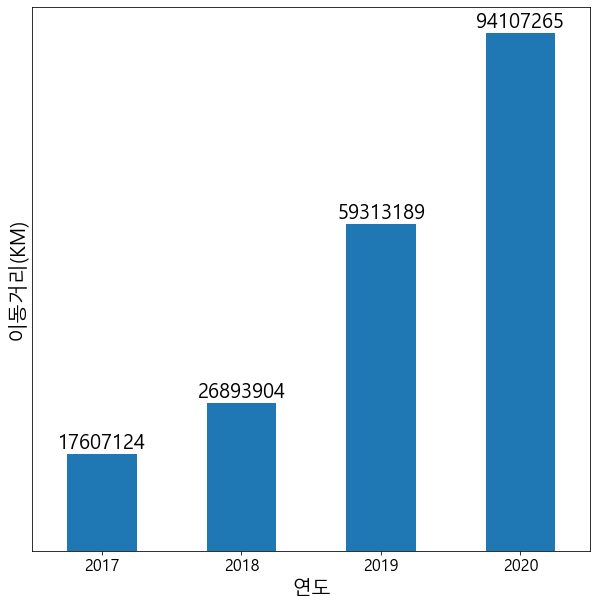

In [6]:
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
df2 = new_data['sum']['이동거리(KM)']/10**7
df2.plot(kind='bar',grid=False, figsize=(10,10))
plt.xlabel('연도', fontsize=20)
plt.ylabel('이동거리(KM)', fontsize=20)
plt.xticks(fontsize=16, rotation=0)
for i in range(len(df2)):
    plt.text(i, df2.iloc[i], int(df2.iloc[i]*10**7),
             fontsize=20,
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

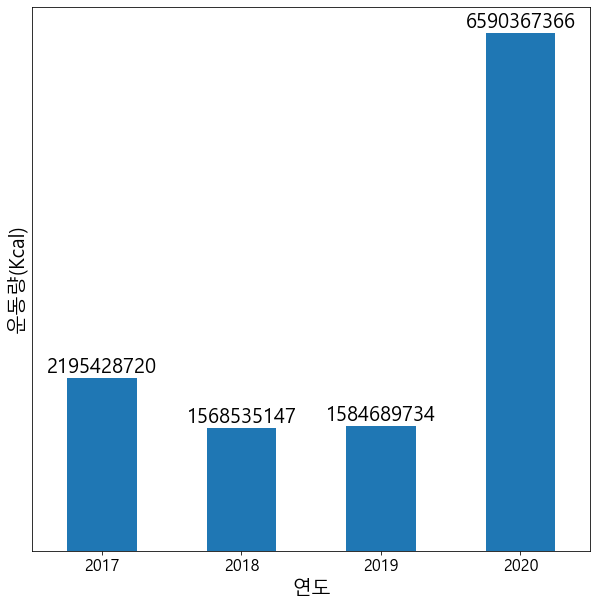

In [7]:
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
df2 = new_data['sum']['운동량(Kcal)']/10**7
df2.plot(kind='bar',grid=False, figsize=(10,10))
plt.xlabel('연도', fontsize=20)
plt.ylabel('운동량(Kcal)', fontsize=20)
plt.xticks(fontsize=16, rotation=0)
for i in range(len(df2)):
    plt.text(i, df2.iloc[i], int(df2.iloc[i]*10**7),
             fontsize=20,
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

In [8]:
new_data=pd.pivot_table(Bicycle_Seoul, index = ['년도','연령대코드'], values=['사용시간(분)','이용건수'],\
                        aggfunc = ['sum','mean'])
new_data

sum                 mean          
              사용시간(분)      이용건수    사용시간(분)      이용건수
년도   연령대코드                                          
2017 10대이하    3607892    122261  32.633182  1.105844
     20대     63536419   2265774  35.165826  1.254050
     30대     31703216   1230510  30.402768  1.180035
     40대     18033860    695699  29.347830  1.132162
     50대      7295313    274026  27.879928  1.047224
     60대      2141336     72502  30.370114  1.028280
     70대이상     880344     35362  26.420888  1.061285
2018 10대이하    3884583    149339  28.146093  1.082049
     20대     87482496   3524402  30.813938  1.241399
     30대     48446216   1931172  29.414003  1.172506
     40대     28326423   1111652  28.540793  1.120065
     50대     13062847    506706  27.048816  1.049220
     60대      3457815    120959  29.098349  1.017899
     70대이상    1115628     42932  26.365458  1.014605
2019 10대이하   20947770    785831  32.758940  1.228913
     20대    191639747   7791170  33.977811  1.381378
     30대     91299990   3619938  30.634024  1.214603
     40대     56001346   2167386  29.731665  1.150687
     50대     29320893   1147700  27.575502  1.079381
     60대      7968159    273381  30.136873  1.033971
     70대이상    1608598     59328  27.744494  1.023267
2020 10대이하   41606373   1337578  36.471320  1.172494
     20대    292652903  10300504  37.139532  1.307200
     30대    154447716   5224796  35.026280  1.184900
     40대    106940401   3309286  36.776096  1.138042
     50대     59075391   1897846  33.545950  1.077692
     60대     16434720    483763  35.005772  1.030410
     70대이상    2853930     85734  33.872530  1.017554

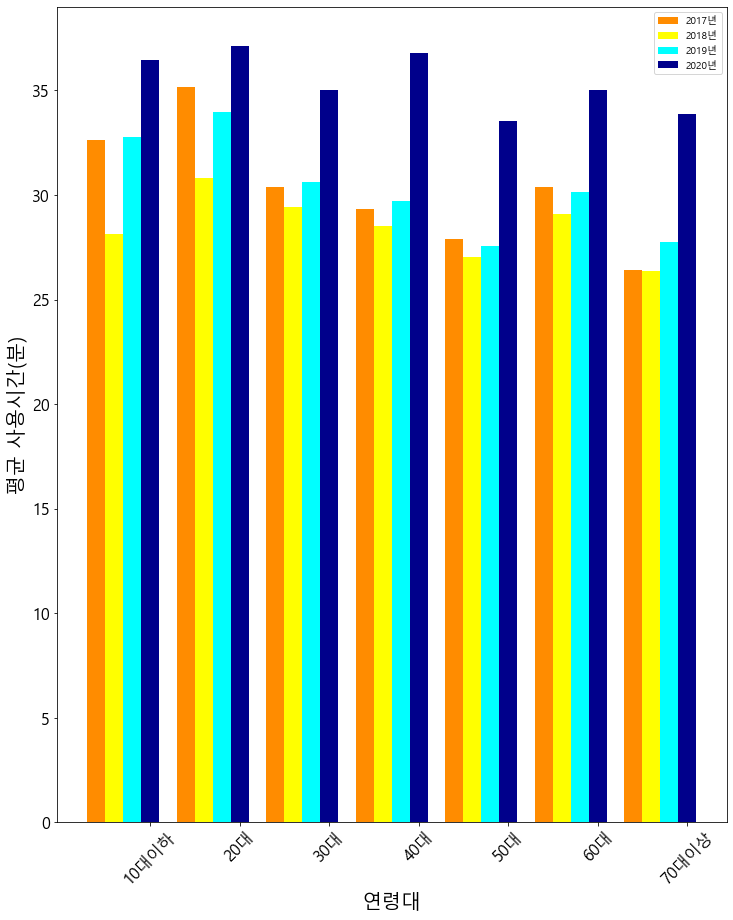

In [9]:
plt.figure(figsize = (12, 15))
age_list=['10대이하','20대','30대','40대','50대','60대','70대이상']
x=np.arange(len(age_list))
plt.bar(x-0.6,new_data.loc[2017]['mean']['사용시간(분)'], label='2017년', width=0.2,color='darkorange')
plt.bar(x-0.4,new_data.loc[2018]['mean']['사용시간(분)'], label='2018년', width=0.2,color='yellow')
plt.bar(x-0.2,new_data.loc[2019]['mean']['사용시간(분)'], label='2019년', width=0.2,color='cyan')
plt.bar(x-0,new_data.loc[2020]['mean']['사용시간(분)'], label='2020년', width=0.2, color='darkblue')
plt.xlabel('연령대', fontsize=20)
plt.ylabel('평균 사용시간(분)', fontsize=20)
plt.xticks(x,age_list,fontsize=16, rotation=45)
plt.yticks(fontsize=16, rotation=0)
plt.legend(['2017년', '2018년','2019년','2020년'])
plt.show()